In [ ]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

## Reading in the 1/4 degree data and calculating KE

In [2]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)  
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[560,240,1]),(2,0,1)) 
xh_025 = fs.xh.values
yh_025 = fs.yh.values
area_t=fs['area_t']


KE_ij_025 = np.zeros([100,560,240])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_025[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_025=np.nanmean(KE_ij_025,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


## Reading in the 1/8 degree data and calculating KE

In [4]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_dataset('averages_00004502.nc', decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [5]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[1120,480,1]),(2,0,1)) 
xh_0125 = fs.xh.values
yh_0125 = fs.yh.values
area_t=fs['area_t']


KE_ij_0125 = np.zeros([100,1120,480])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_0125[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_0125=np.nanmean(KE_ij_0125,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


## Reading in the 1/16 degree data and performing energy decomposition

In [6]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_dataset('averages_00006002.nc', decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [7]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[2240,960,1]),(2,0,1)) 
xh_00625 = fs.xh.values
yh_00625 = fs.yh.values
area_t=fs['area_t']


KE_ij_00625 = np.zeros([100,2240,960])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_00625[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_00625=np.nanmean(KE_ij_00625,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


## Reading in the 1/32 degree data and performing energy decomposition

In [10]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_mfdataset(['averages_00001002.nc','averages_00001102.nc','averages_00001202.nc','averages_00001302.nc','averages_00001402.nc'], decode_times=False,combine='by_coords')

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/


/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [11]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[4480,1920,1]),(2,0,1)) 
xh_003125 = fs.xh.values
yh_003125 = fs.yh.values
area_t=fs['area_t']


KE_ij_003125 = np.zeros([100,4480,1920])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_003125[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_003125=np.nanmean(KE_ij_003125,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


Text(0.5, 1.0, 'Kinetic Energy')

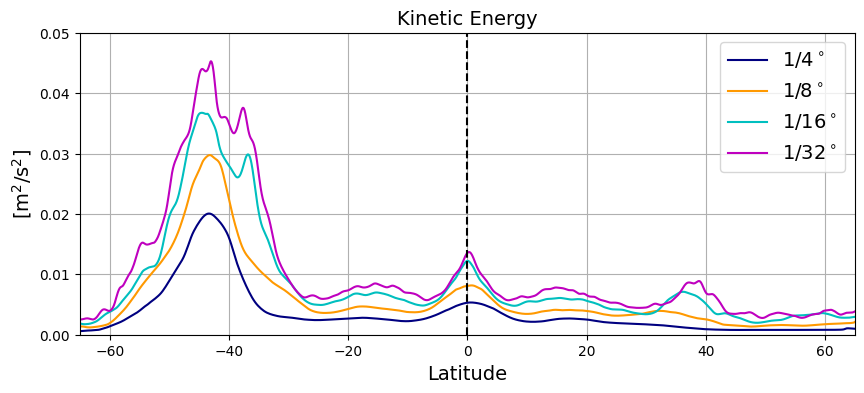

In [15]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=30

plt.figure(figsize=(10, 4), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(yh,np.nanmean(fraction_BT,axis=1),'-',c='#82cafc',linewidth=3)
plt.plot(yh_025,np.convolve(np.nanmean(KE_ij_025,axis=1), np.ones((window,))/window, mode='same'),'-',color=[0,0,0.5])
plt.plot(yh_0125,np.convolve(np.nanmean(KE_ij_0125,axis=1), np.ones((window,))/window, mode='same'),'-',color=[1,.6,0])
plt.plot(yh_00625,np.convolve(np.nanmean(KE_ij_00625,axis=1), np.ones((window,))/window, mode='same'),'-',color='c')
plt.plot(yh_003125,np.convolve(np.nanmean(KE_ij_003125,axis=1), np.ones((window,))/window, mode='same'),'-',color='m')

plt.grid()

plt.legend(['1/4$^\circ$','1/8$^\circ$','1/16$^\circ$','1/32$^\circ$'],loc='upper right',fontsize=14)
plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
plt.xlim(-65, 65)
plt.ylim(0,.05);
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('[m$^2$/s$^2$]',fontsize=14)
plt.title('Kinetic Energy',fontsize=14)

### Including the GM runs, KHTH = 100, 500 (suggested value), 1000, 2500 m^2/s. 

In [4]:
#KHTH = 100 m2/s. directory: /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run1
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run1
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00000500.nc', decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)
#Read in data
Nlayers=15
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GM100 = fs.xh.values
yh_GM100 = fs.yh.values
area_t=fs['area_t']


KE_ij_GM100 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GM100[i,:,:]= np.nansum(KE_3D,axis=0)
    #print(i)
print('done')
KE_ij_GM100=np.nanmean(KE_ij_GM100,axis=0)

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run1
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
done


In [5]:
#KHTH = 500 m2/s. directory: /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00000500.nc', decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

#Read in data
Nlayers=15
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GM500 = fs.xh.values
yh_GM500 = fs.yh.values
area_t=fs['area_t']


KE_ij_GM500 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GM500[i,:,:]= np.nansum(KE_3D,axis=0)
    #print(i)
print('done')
KE_ij_GM500=np.nanmean(KE_ij_GM500,axis=0)

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run3
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
done


In [6]:
#KHTH = 1000 m2/s. directory: /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run5
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run5
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00000500.nc', decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)
#Read in data
Nlayers=15
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GM1000 = fs.xh.values
yh_GM1000 = fs.yh.values
area_t=fs['area_t']


KE_ij_GM1000 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GM1000[i,:,:]= np.nansum(KE_3D,axis=0)
    #print(i)
print('done')
KE_ij_GM1000=np.nanmean(KE_ij_GM1000,axis=0)

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
done


In [7]:
#KHTH = 2500 m2/s. directory: /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run6
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run6
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00000500.nc', decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

av     = xr.open_dataset('averages_00031502.nc', decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)
#Read in data
Nlayers=15
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GM2500 = fs.xh.values
yh_GM2500 = fs.yh.values
area_t=fs['area_t']


KE_ij_GM2500 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GM2500[i,:,:]= np.nansum(KE_3D,axis=0)
    #print(i)
print('done')
KE_ij_GM2500=np.nanmean(KE_ij_GM2500,axis=0)

/glade/p/univ/unyu0004/neerajab/NeverWorld2/runGM/run6
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
done


Text(0.5, 1.0, 'KE/mass for each model column, zonally averaged')

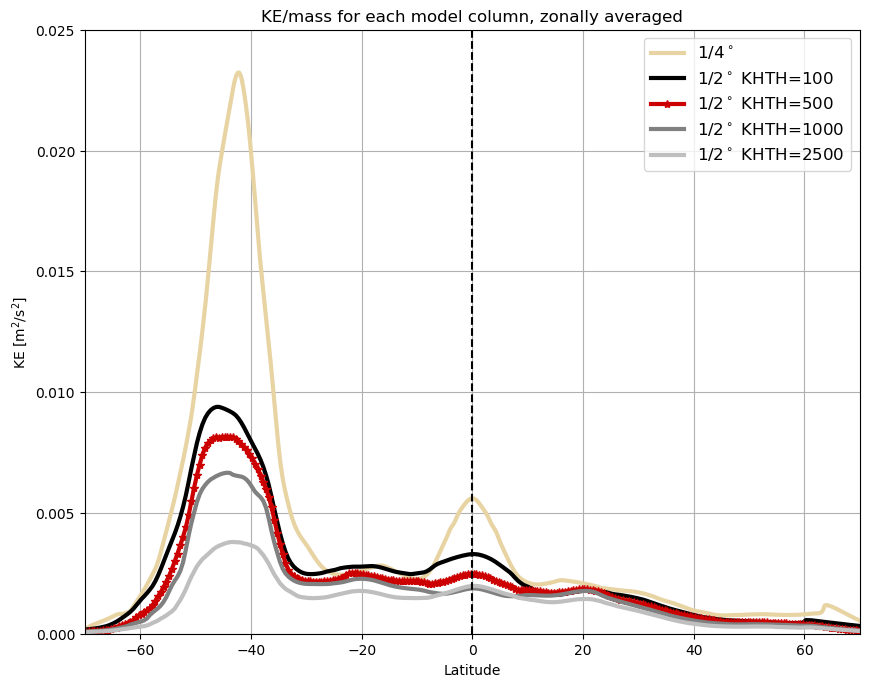

In [9]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=30

plt.figure(figsize=(10, 8), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(yh,np.nanmean(fraction_BT,axis=1),'-',c='#82cafc',linewidth=3)
plt.plot(yh_025,np.convolve(np.nanmean(KE_ij_025,axis=1), np.ones((window,))/window, mode='same'),'-',c='#e8d3a3',linewidth=3)
#plt.plot(yh_0125,np.convolve(np.nanmean(KE_ij_0125,axis=1), np.ones((window,))/window, mode='same'),'-',c='#ffa633',linewidth=3)
#plt.plot(yh_00625,np.convolve(np.nanmean(KE_ij_00625,axis=1), np.ones((window,))/window, mode='same'),'-',c='#3b5a9d',linewidth=3)
#plt.plot(yh_003125,np.convolve(np.nanmean(KE_ij_003125,axis=1), np.ones((window,))/window, mode='same'),'-',c='#4fb2aa',linewidth=3)

plt.plot(yh_GM100,np.convolve(np.nanmean(KE_ij_GM100,axis=1), np.ones((window,))/window, mode='same'),'-',c=[0, 0, 0],linewidth=3)
plt.plot(yh_GM500,np.convolve(np.nanmean(KE_ij_GM500,axis=1), np.ones((window,))/window, mode='same'),'-*',c=[0.8, 0, 0],linewidth=3)
plt.plot(yh_GM1000,np.convolve(np.nanmean(KE_ij_GM1000,axis=1), np.ones((window,))/window, mode='same'),'-',c=[.5, 0.5, 0.5],linewidth=3)
plt.plot(yh_GM2500,np.convolve(np.nanmean(KE_ij_GM2500,axis=1), np.ones((window,))/window, mode='same'),'-',c=[.75, .75, .75],linewidth=3)


plt.grid()

plt.legend(['1/4$^\circ$','1/2$^\circ$ KHTH=100','1/2$^\circ$ KHTH=500','1/2$^\circ$ KHTH=1000','1/2$^\circ$ KHTH=2500'],loc='upper right',fontsize=12)
plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
plt.xlim(-70, 70)
#plt.ylim(0,.006);
plt.ylim(0,.025);
plt.xlabel('Latitude')
plt.ylabel('KE [m$^2$/s$^2$]')
plt.title('KE/mass for each model column, zonally averaged')